In [ ]:
import time
from random import shuffle
from pdp_lib import processing as proc
from pdp_lib import util
from GA_lib import GA
from GA_lib import operation
from GA_lib import evaluate
from GA_lib import modify

# Load file (Use realative path), Create distances and duration tables


In [8]:
start_time = time.time()
# use 'relative path' in filename
filename = 'pdp_instances/LiLim/pdp_100/lc107.txt'

numVehicles, loadCapacities, speed, data = proc.load_file(filename)
LOCATIONS = data[0]
demands = data[1]
timeWindows = data[2]
serviceTimes = data[3]
pickupSiblings = data[4]
deliverySiblings = data[5]
requestType = data[6]
REQUESTS = proc.generate_request(pickupSiblings,deliverySiblings,requestType)
DISTANCES = proc.createDistanceTable(LOCATIONS)
DURATIONS = proc.createDurationTable(LOCATIONS, DISTANCES, serviceTimes, speed)


print(" processing time --- %s seconds ---" % (time.time() - start_time))

 processing time --- 0.02496814727783203 seconds ---


# Unoptimized Routes

Unoptimized distances is: 3367.79589042


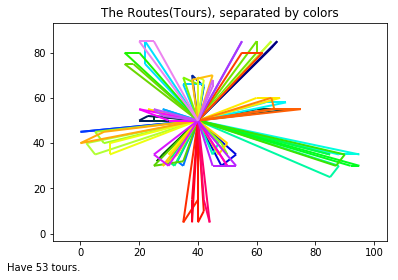

In [9]:
unlimitedVehicles=300
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,unlimitedVehicles,maxSpot=2)
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Unoptimized distances is: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)

# Create a chromosome.

Chromosome initializing time --- 0.9140844345092773 seconds ---
Tour Distances of chromosome: 1791.02759859


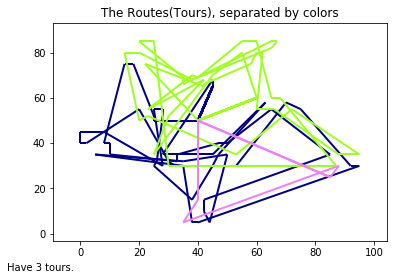

[[0, [21, 24, 33, 34, 19, 22, 16, 8, 37, 0, 29, 18, 26, 20, 36, 42, 11, 31, 17, 46, 10, 12, 35, 13, 43, 23, 27, 28], [20, 24, 25, 17, 18, 33, 32, 31, 42, 43, 67, 65, 63, 87, 81, 104, 55, 54, 53, 62, 41, 35, 40, 58, 56, 70, 73, 82, 84, 72, 44, 46, 30, 37, 38, 39, 101, 36, 34, 48, 26, 23, 102, 22, 50, 51, 59, 68, 66, 89, 69, 47, 105, 49, 1, 75]], [1, [9, 41, 51, 14, 15, 5, 1, 50, 39, 2, 48, 45, 3, 47, 44, 7, 32, 25, 6, 49, 38, 52, 4], [13, 7, 5, 3, 98, 96, 95, 90, 86, 78, 76, 71, 83, 74, 27, 29, 19, 15, 8, 94, 92, 93, 10, 11, 16, 14, 12, 45, 64, 61, 103, 79, 85, 88, 97, 100, 106, 6, 9, 28, 4, 21, 52, 2, 99, 91]], [2, [40, 30], [57, 60, 77, 80]], [3, [], []], [4, [], []], [5, [], []], [6, [], []], [7, [], []], [8, [], []], [9, [], []], [10, [], []], [11, [], []], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [11]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)

# Try restricting the 'max spots' to visit not more than 10 spots per vehicle

Chromosome initializing time --- 0.022055387496948242 seconds ---
Tour Distances of chromosome: 2287.27344652


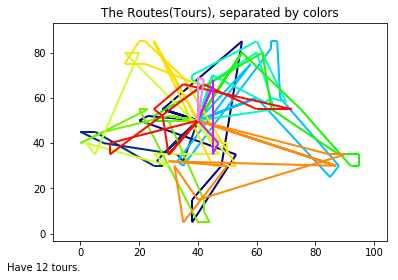

[[0, [11, 31, 38, 52, 14], [27, 29, 74, 58, 59, 64, 100, 106, 23, 102]], [1, [17, 21, 20, 27, 23], [41, 43, 33, 39, 101, 36, 51, 48, 50, 49]], [2, [48, 44, 40, 22, 51], [98, 42, 40, 94, 93, 92, 85, 77, 80, 91]], [3, [2, 43, 45, 50, 5], [86, 96, 5, 8, 9, 97, 84, 88, 89, 2]], [4, [49, 46, 36, 41, 12], [24, 25, 95, 87, 78, 71, 70, 73, 82, 99]], [5, [29, 28, 15, 10, 19], [20, 55, 54, 53, 56, 30, 28, 38, 34, 21]], [6, [33, 25, 34, 18, 9], [65, 63, 62, 19, 15, 35, 37, 45, 52, 66]], [7, [6, 37, 8, 7, 4], [7, 13, 17, 18, 16, 14, 11, 72, 68, 12]], [8, [30, 24, 32, 42, 39], [81, 104, 76, 57, 44, 60, 61, 103, 46, 79]], [9, [47, 1, 13, 26, 16], [32, 31, 3, 90, 83, 10, 26, 22, 47, 105]], [10, [35, 0], [67, 69, 1, 75]], [11, [3], [6, 4]], [12, [], []], [13, [], []], [14, [], []], [15, [], []], [16, [], []], [17, [], []], [18, [], []], [19, [], []], [20, [], []], [21, [], []], [22, [], []], [23, [], []], [24, [], []]]


In [12]:
start_time = time.time()
chromosome = GA.initialize_Feasible_chromosome(DISTANCES, DURATIONS, timeWindows,REQUESTS,numVehicles,maxSpot=10)
cal_time = time.time() - start_time
print("Chromosome initializing time --- %s seconds ---" % (cal_time))
dist = evaluate.chromosomeRoutesDistance(chromosome,DISTANCES)
print('Tour Distances of chromosome: '+str(dist))
util.draw_tours(chromosome,LOCATIONS)
print (chromosome)